# Clustering

In [38]:
# Import KMeans from sklearn.cluster
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_theme()

# import final data from eda
%store -r data6D

In [39]:
print(data6D)

            0         1         2         3         4         5  \
0    3.473448 -0.537316  0.074081 -0.235088  0.511475 -1.941004   
1   -0.202452  1.186812  0.610414  1.070507 -0.234381 -0.595684   
2    0.204608  0.443911 -0.728013  1.330052  1.061151 -1.678352   
3   -2.043319  0.576546  0.344473 -0.951513 -1.026634  0.069516   
4    3.554933 -1.534343 -1.964757  0.905562 -0.178777 -1.640465   
..        ...       ...       ...       ...       ...       ...   
186 -0.534308  0.481981 -0.309286 -0.042963  0.524022  0.170793   
187  0.278156 -0.374078  0.043061  1.390105 -1.042502  1.429513   
188  2.703719 -0.262932  0.197439 -0.432571  1.213000 -1.367733   
189  3.099094 -1.207925 -1.517319  0.408814  0.221934  0.198493   
190  2.432728 -0.365457  0.018818 -0.519973 -0.701227  1.042385   

                                Country  
0                           Afghanistan  
1                               Albania  
2                               Algeria  
3                          

# Determining ideal number of clusters
We will be trying two methods to determine the ideal number of clusters:  
1. Elbow method based on WSS  
2. Silhouette method  


### Elbow method
Varry clusters from 1 to 50

<AxesSubplot:xlabel='clusters', ylabel='wss'>

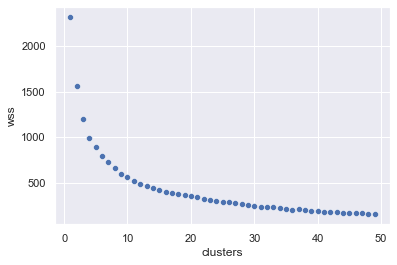

In [40]:
CLUSTERS = range(1,50) # clusters
CENTROID_SEL = "k-means++"

# exlcude countries
countries = data6D["Country"]
data6D = data6D.drop(columns=["Country"])

# array to store: (cluster_num, score)
scores = []

# generate WSS score for each cluster_num from 1 to 50
for num in CLUSTERS:
    kmeans = KMeans(n_clusters=num, init=CENTROID_SEL)
    model = kmeans.fit(data6D)
    wss = model.inertia_
    scores.append([num, wss])

# convert array to dataframe
scores = pd.DataFrame(scores, columns=["clusters", "wss"])

# plot the scores on "eblow plot"
sb.scatterplot(x="clusters", y="wss", data=scores)

From elbow method plot, the ideal number of clusters appears to be between 4 to 6

### Silouhette method

Silhouette score can be within a range of -1 to +1. The higher the score the better.  

score measures both cohesion (inter cluster closeness) and seperation (between cluster seperation).   

Each data point (x) has a value for cohesion and seperation. 
cohesion, a = mean of euclidean distance from x to every other point within the cluster  
seperation = mean of euclidean distance from x to every point in another cluster  
b = minimum of all the seperation scores (this gives us the average distance to the nearest cluster)  
silouhette coefficient = (b - a) / max(a,b)  
Since we want b to be as large as possible and a to be as small as possible: the best score is 1 and worst is -1  

Cluster with highest score:
   clusters     score
2         4  0.338396


<AxesSubplot:xlabel='clusters', ylabel='score'>

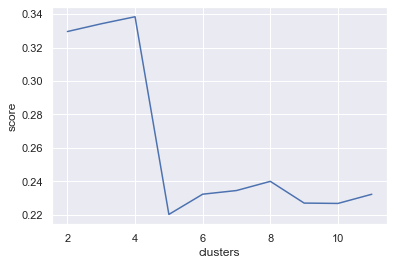

In [41]:
scores = []
CLUSTERS = CLUSTERS = range(2,12) # minimum of 2 clusters in needed to calculate silouhette score
for num in CLUSTERS:
    # labels is an array, where each  data-point is assigned to a cluster
    # example: [0,1,1,2,4,3,...] means that the first point is in cluster 0, 2nd point is in cluster 1 and so on
    labels = KMeans(n_clusters=num, init=CENTROID_SEL, random_state=200).fit(data6D).labels_

    # determine silouhette score
    score = metrics.silhouette_score(data6D, labels, metric="euclidean", sample_size=191, random_state=200)
    scores.append([num, score])

# convert array to dataframe
scores = pd.DataFrame(scores, columns=["clusters", "score"])

# select maximum score
max = scores["score"].max()
print("Cluster with highest score:")
print(scores[scores["score"] == max])

# plot the scores on "eblow plot"
sb.lineplot(x="clusters", y="score", data=scores)


We will use 4 as our number of clusters according to the result from the silhouette score analysis 

# Creating and Evaluating KMeans model

In [42]:
OPTIMAL_CLUSTERS = 4
model = KMeans(n_clusters = OPTIMAL_CLUSTERS, init = CENTROID_SEL, n_init = 20).fit(data6D)


Within Cluster Sum of Squares : 988.9675263236587

cluster 0, cluster 1, cluster 2 cluster 3
56 29 3 103


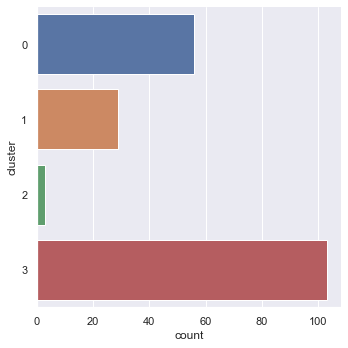

In [43]:
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", model.inertia_)
print()

# Predict the Cluster Labels
cluster_labels = model.predict(data6D)

# add cluster labels back to data
clustered_data = data6D.copy()
clustered_data["cluster"] = pd.Categorical(cluster_labels)

# Summary of the Clusters
print("cluster 0, cluster 1, cluster 2", "cluster 3")
count0 = clustered_data[clustered_data["cluster"] == 0]["cluster"].count()
count1 = clustered_data[clustered_data["cluster"] == 1]["cluster"].count()
count2 = clustered_data[clustered_data["cluster"] == 2]["cluster"].count()
count3 = clustered_data[clustered_data["cluster"] == 3]["cluster"].count()
print(count0, count1, count2, count3)

sb.catplot(y = "cluster", data = clustered_data, kind = "count")

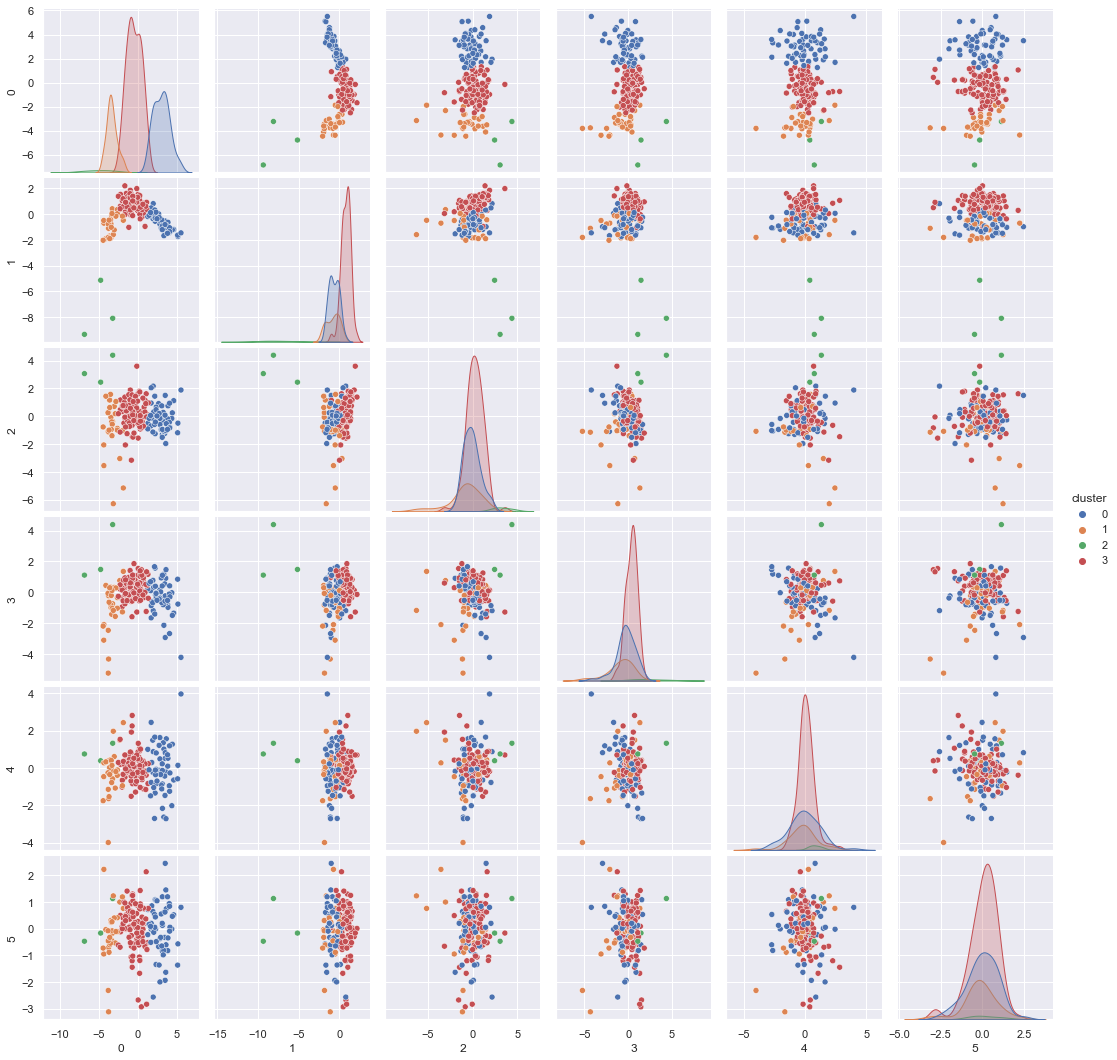

In [44]:
# Plot the Clusters on 2D grids
sb.pairplot(clustered_data, vars = data6D.columns.values, hue = "cluster")

In [45]:
clustered_data["Country"] = countries

In [47]:
# countries in cluster 0
cluster0 = clustered_data[clustered_data["cluster"] == 0]["Country"]
cluster1 = clustered_data[clustered_data["cluster"] == 1]["Country"]
cluster2 = clustered_data[clustered_data["cluster"] == 2]["Country"]
cluster3 = clustered_data[clustered_data["cluster"] == 3]["Country"]


0                           Afghanistan
4                                Angola
18                                Benin
20     Bolivia (Plurinational State of)
26                         Burkina Faso
27                              Burundi
29                             Cambodia
30                             Cameroon
32             Central African Republic
33                                 Chad
37                              Comoros
38                                Congo
45     Democratic Republic of the Congo
47                             Djibouti
53                    Equatorial Guinea
54                              Eritrea
56                             Ethiopia
61                               Gambia
64                                Ghana
68                               Guinea
70                                Haiti
85                                Kenya
86                             Kiribati
89     Lao People's Democratic Republic
92                              Lesotho


In [48]:
print("Cluster 0")
print(cluster0)

Cluster 0
0                           Afghanistan
4                                Angola
18                                Benin
20     Bolivia (Plurinational State of)
26                         Burkina Faso
27                              Burundi
29                             Cambodia
30                             Cameroon
32             Central African Republic
33                                 Chad
37                              Comoros
38                                Congo
45     Democratic Republic of the Congo
47                             Djibouti
53                    Equatorial Guinea
54                              Eritrea
56                             Ethiopia
61                               Gambia
64                                Ghana
68                               Guinea
70                                Haiti
85                                Kenya
86                             Kiribati
89     Lao People's Democratic Republic
92                            

In [49]:
print("Cluster 1")
print(cluster1)

Cluster 1
8                 Australia
9                   Austria
12                  Bahrain
16                  Belgium
31                   Canada
46                  Denmark
58                  Finland
59                   France
73                  Iceland
78                  Ireland
79                   Israel
80                    Italy
82                    Japan
87                   Kuwait
95            Liechtenstein
97               Luxembourg
109                  Monaco
118             Netherlands
119             New Zealand
123                  Norway
134                   Qatar
135       Republic of Korea
144              San Marino
151               Singapore
158                   Spain
163                  Sweden
164             Switzerland
179    United Arab Emirates
180          United Kingdom
Name: Country, dtype: object


In [50]:
print("Cluster 2")
print(cluster2)

Cluster 2
35                        China
63                      Germany
182    United States of America
Name: Country, dtype: object


In [51]:
print("Cluster 3")
print(cluster3)

Cluster 3
1                                 Albania
2                                 Algeria
3                                 Andorra
5                     Antigua and Barbuda
6                               Argentina
                      ...                
176                                Tuvalu
178                               Ukraine
183                               Uruguay
186    Venezuela (Bolivarian Republic of)
187                              Viet Nam
Name: Country, Length: 103, dtype: object
